<a href="https://colab.research.google.com/github/YoonhoNam/cmcradiomics/blob/master/processing/dip_nifti_dilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing example: nifti, erosion, dilation

nifti util인 nibabel이 설치되어 있지 않은 경우 !pip install nibabel로 설치함. 나머지는 anaconda나 google colab.의 경우 기본적으로 설치되어 있을 것입니다.

In [1]:
!pip install nibabel

In [0]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as mp

***프로세싱할 영상데이터 및 mask에 대한 nifti의 경로를 정확하게 입력합니다.***

In [0]:
t2 = nib.load('/content/drive/My Drive/mary/jjy/radiomics/T2.nii.gz')
msk = nib.load('/content/drive/My Drive/mary/jjy/radiomics/seg2.nii.gz')

제대로 불러왔는지 사이즈 확인

size of t2 image =  (448, 448, 35)
size of msk image =  (448, 448, 35)
slice # of largest mass: 18


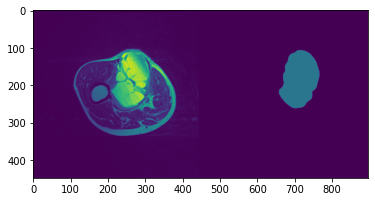

In [4]:
t2img = t2.get_fdata()
print('size of t2 image = ',t2img.shape)
mskimg = msk.get_fdata()
print('size of msk image = ',mskimg.shape)

zzz=np.sum(np.sum(mskimg,axis=1),axis=0);
zmax=np.argmax(zzz)
print('slice # of largest mass:',zmax)

n_slice = zmax # slice number to be displayed
plt.imshow(np.concatenate((t2img[:,:,n_slice],1000*mskimg[:,:,n_slice]),axis=1))

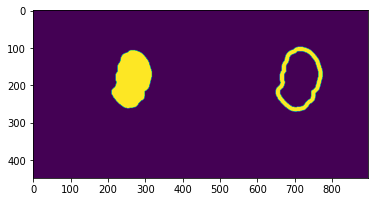

In [5]:
Ne = 3 # erosion의 정도를 결정
Nd = 9 # dilation의 정도를 결정

mskimg2 = mskimg>0.5
mskimg2e = np.zeros(mskimg.shape)
mskimg2d = np.zeros(mskimg.shape)
NX,NY,NZ=mskimg.shape
NZ
# for 2d erosion/dilation (for conventional 2D MR images)
for nz in range(NZ):
  mskimg2e[:,:,nz] = mp.binary_erosion(mskimg2[:,:,nz],selem=mp.disk(Ne))
  mskimg2d[:,:,nz] = mp.binary_dilation(mskimg2[:,:,nz],selem=mp.disk(Nd))

# for 3d erosion/dilation (for 3D MR images, not recommended for 2D data with thick slice)
# mskimg2e=mp.binary_erosion(mskimg2,selem=mp.disk(Ne))
# mskimg2d=mp.binary_dilation(mskimg2,selem=mp.disk(Nd))
plt.imshow(np.concatenate((mskimg2[:,:,n_slice],(mskimg2d[:,:,n_slice].astype(int)-mskimg2e[:,:,n_slice].astype(int))>0.5),axis=1))

***nib.save를 이용해 저장함. 저장할 파일의 이름과 경로를 정확하게 입력합니다.***



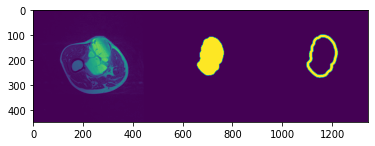

In [6]:
mskimg_new = ((mskimg2d.astype(int)-mskimg2e.astype(int))>0.5).astype(int)
msk_new=nib.Nifti1Image(mskimg_new,msk.affine,msk.header)
nib.save(msk_new,'/content/drive/My Drive/mary/jjy/radiomics/seg2new.nii.gz')
plt.imshow(np.concatenate((t2img[:,:,n_slice],3000*mskimg[:,:,n_slice],3000*mskimg_new[:,:,n_slice]),axis=1))